<a href="https://colab.research.google.com/github/samuel127jules/es22452/blob/main/Lab4ES2245.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

m = 45.2
delta_m = 0.8

V = 16.5
delta_V = 1.2

rho = m/V

frac_m = delta_m/m
frac_V = delta_V/V

frac_rho = np.sqrt(frac_m**2 + frac_V**2)

delta_rho = frac_rho * rho

print(f"Mass fractional error:   {frac_m:.4f}")
print(f"Volume fractional error: {frac_V:.4f}")
print(f"Density: {rho:.3f} +/- {delta_rho:.3f} g/cm^3")

Mass fractional error:   0.0177
Volume fractional error: 0.0727
Density: 2.739 +/- 0.205 g/cm^3


In [4]:
T = 300
delta_T = 3
n = 4

frac_T = delta_T/T

frac_E = n * frac_T

print(f"Temperature Fractional Uncertainty: {frac_T:.2%}")
print(f"Energy Fractional Uncertainty:      {frac_E:.2%}")
print(f"Factor of increase: {frac_E / frac_T:.1f}x")

Temperature Fractional Uncertainty: 1.00%
Energy Fractional Uncertainty:      4.00%
Factor of increase: 4.0x


Mean (Target 50): 50.011
Std  (Target 5):  4.987
Skewness (Target 0): -0.011
Excess Kurtosis (Target 0): -0.045


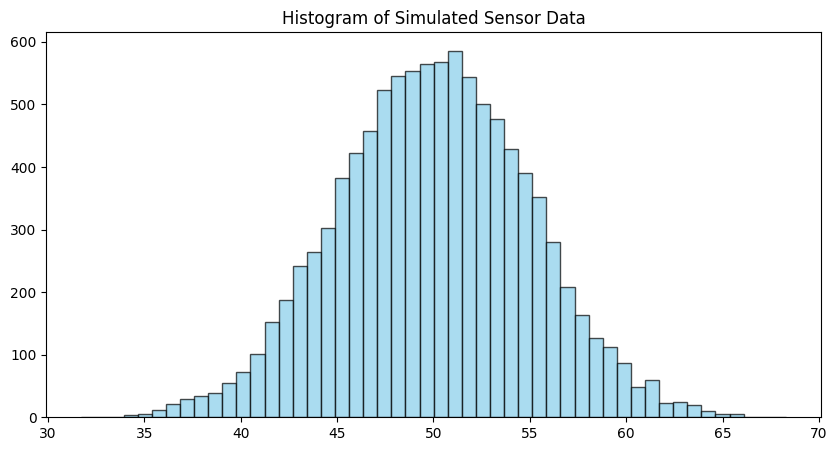

In [6]:
mu = 50
sigma = 5
n_samples = 10000

data = np.random.normal(mu, sigma, n_samples)

calc_mean = np.mean(data)
calc_std = np.std(data)
calc_skew = skew(data)
calc_kurt = kurtosis(data)

print(f"Mean (Target 50): {calc_mean:.3f}")
print(f"Std  (Target 5):  {calc_std:.3f}")
print(f"Skewness (Target 0): {calc_skew:.3f}")
print(f"Excess Kurtosis (Target 0): {calc_kurt:.3f}")

plt.figure(figsize=(10, 5))
plt.hist(data, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Simulated Sensor Data')
plt.show()

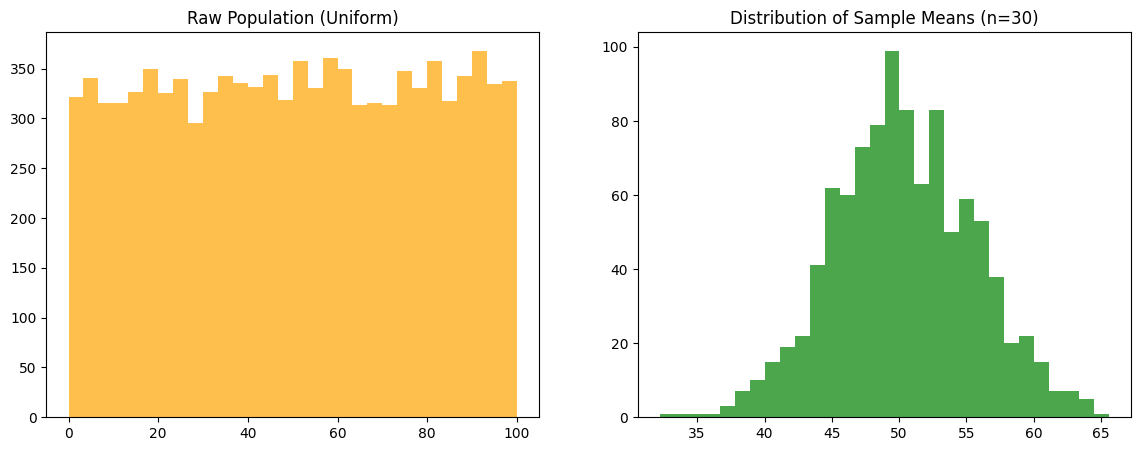

In [7]:
pop_data = np.random.uniform(0, 100, 10000)

sample_means = []
sample_size = 30
num_experiments = 1000

for i in range(num_experiments):
    sample = np.random.choice(pop_data, sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
    pass

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(pop_data, bins=30, color='orange', alpha=0.7)
plt.title('Raw Population (Uniform)')

plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='green', alpha=0.7)
plt.title(f'Distribution of Sample Means (n={sample_size})')

plt.show()

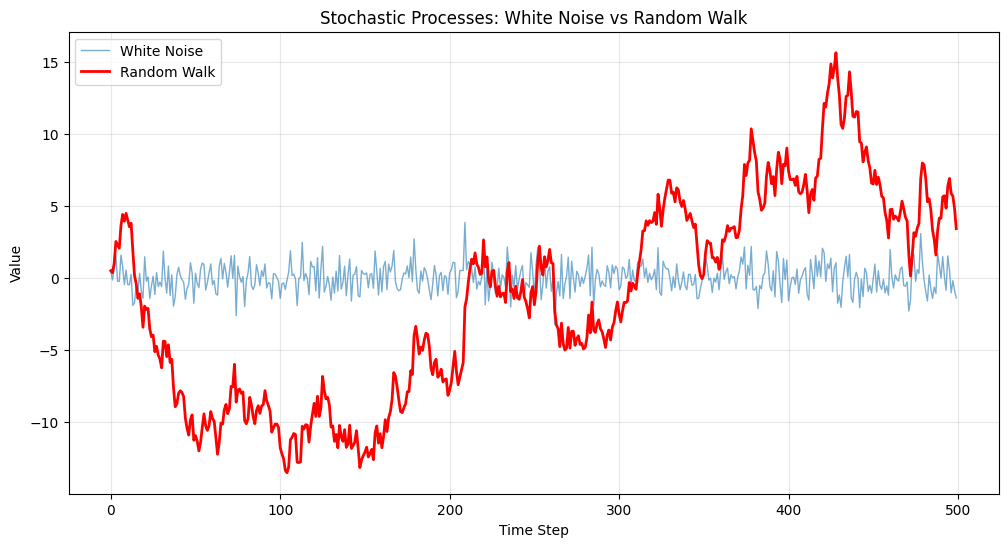

In [8]:
steps = 500
np.random.seed(42)

white_noise = np.random.normal(0, 1, steps)

random_walk = np.cumsum(white_noise)

time = np.arange(steps)

plt.figure(figsize=(12, 6))
plt.plot(time, white_noise, label='White Noise', alpha=0.6, linewidth=1)
plt.plot(time, random_walk, label='Random Walk', linewidth=2, color='red')
plt.title('Stochastic Processes: White Noise vs Random Walk')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

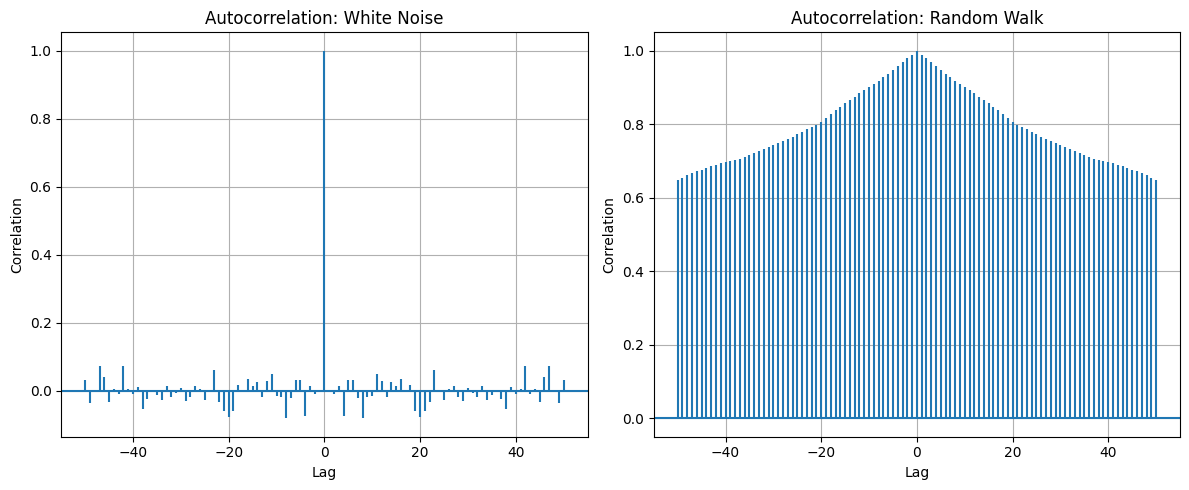

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.acorr(white_noise, maxlags=50, usevlines=True, normed=True)
plt.title('Autocorrelation: White Noise')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.acorr(random_walk - np.mean(random_walk), maxlags=50, usevlines=True, normed=True)

plt.title('Autocorrelation: Random Walk')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)

plt.tight_layout()
plt.show()

Question 1: Based on Lecture 6, describe the difference between Epistemic and Aleatoric uncertainty. In the Random Walk simulation (Exercise 5), which type of uncertainty does the "white noise" step represent at each individual moment?

Epistemic uncertainty is the idea that we do not "know enough", whereas aleatoric uncertainty states that the "world is random". These differ in that epistemic may just be our fault and aleatoric would be that the world is impossible to predict and get an accurate read on. In exercise 5, we see that it is epistemic. Random walk is the integral of white noise, so it still falls under the curve.

Question 2: If you were modeling the flight path of a drone, which type of uncertainty would a sudden wind gust (white noise) represent versus a miscalibrated compass (constant bias/drift)?

A sudden wind gust would be aleatoric because that is the world being random. A miscalibrated compass would be epistemic because it is something that needs to be fixed.